# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Activation,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from PIL import Image
from sklearn.metrics import confusion_matrix,classification_report

2021-10-18 17:01:30.503097: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-18 17:01:30.503210: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# **Train Data**

In [2]:
Train_Data=pd.read_csv('../input/gtsrb-german-traffic-sign/Train.csv')
Train_Data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


# **Data Cleaning**

In [3]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [4]:
Train_Data.shape

(39209, 8)

In [5]:
Train_Data.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [6]:
len(Train_Data['ClassId'].value_counts())

43

In [7]:
a=[i for i in Train_Data['Path'] if not i.endswith('.png')]
a

[]

In [8]:
Train_Data['ClassId']=Train_Data['ClassId'].astype(str)

In [9]:
Train_Data=Train_Data[['ClassId','Path']]
Train_Data.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


# **Data Visualization**

<AxesSubplot:xlabel='ClassId', ylabel='count'>

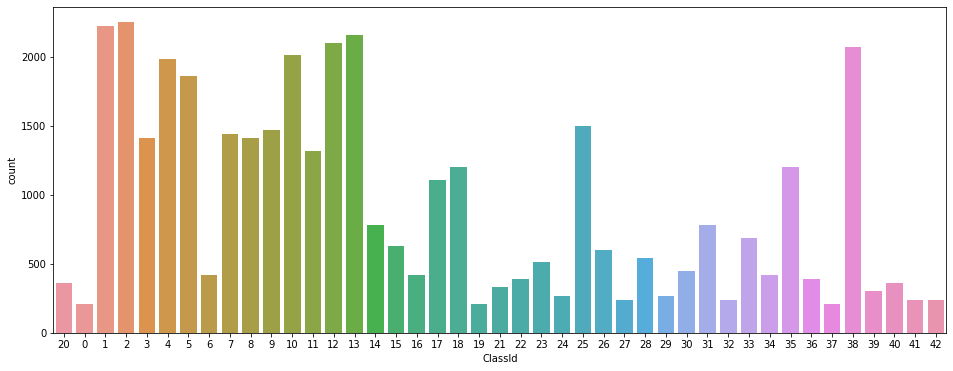

In [10]:
plt.figure(figsize=(16,6))
sn.countplot(x=Train_Data['ClassId'])

# **CNN**

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(43,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

2021-10-18 17:02:06.847918: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-18 17:02:06.851160: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-18 17:02:06.851200: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-18 17:02:06.851233: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (689d333a04a2): /proc/driver/nvidia/version does not exist
2021-10-18 17:02:06.852374: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 118, 118, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 57, 57, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0

In [13]:
early_stopping=EarlyStopping(monitor='val_accuracy',patience=5)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=5,verbose=1,min_lr=0.0001,)
callback=[early_stopping,reduce_lr]

In [14]:
Train_Data,Validation_Data=train_test_split(Train_Data,test_size=0.3,random_state=42)

In [15]:
Train_Data = Train_Data.reset_index(drop=True)
Validation_Data = Validation_Data.reset_index(drop=True)
batch_size=30

In [16]:
Total_Train=Train_Data.shape[0]
Total_Validation=Validation_Data.shape[0]

In [17]:
Total_Train,Total_Validation

(27446, 11763)

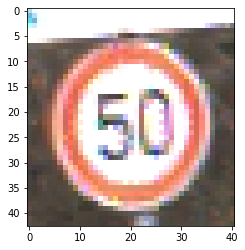

In [18]:
img = Image.open('../input/gtsrb-german-traffic-sign/' + Train_Data['Path'][25])
plt.imshow(img)

In [19]:
Train_gen=ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1./255,
                             horizontal_flip=True)

Train_generator=Train_gen.flow_from_dataframe(Train_Data,
                                              '../input/gtsrb-german-traffic-sign',
                                              x_col='Path',
                                              y_col='ClassId',
                                              
                                              target_size=(120,120),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 27446 validated image filenames belonging to 43 classes.


In [20]:
Validation_gen=ImageDataGenerator(rescale=1./255)

Validation_generator=Validation_gen.flow_from_dataframe(Validation_Data,
                                              '../input/gtsrb-german-traffic-sign',
                                              x_col='Path',
                                              y_col='ClassId',
                                                        
                                              target_size=(120,120),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 11763 validated image filenames belonging to 43 classes.


In [21]:
History=model.fit_generator(Train_generator,
                            steps_per_epoch=Total_Train//batch_size,
                            epochs=30,
                            verbose=1,
                            callbacks=callback,
                            validation_data=Validation_generator,
                            validation_steps=Total_Validation//batch_size)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-10-18 17:02:55.320108: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-18 17:02:55.325829: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/30
914/914 [==============================] - 727s 794ms/step - loss: 2.8154 - accuracy: 0.2853 - val_loss: 1.6443 - val_accuracy: 0.5689
Epoch 2/30
914/914 [==============================] - 707s 774ms/step - loss: 1.1265 - accuracy: 0.6432 - val_loss: 0.7322 - val_accuracy: 0.7611
Epoch 3/30
914/914 [==============================] - 703s 769ms/step - loss: 0.7365 - accuracy: 0.7633 - val_loss: 0.3952 - val_accuracy: 0.8736
Epoch 4/30
914/914 [==============================] - 702s 768ms/step - loss: 0.5676 - accuracy: 0.8173 - val_loss: 0.3593 - val_accuracy: 0.8913
Epoch 5/30
914/914 [==============================] - 702s 768ms/step - loss: 0.4492 - accuracy: 0.8506 - val_loss: 0.2802 - val_accuracy: 0.9092
Epoch 6/30
914/914 [==============================] - 706s 773ms/step - loss: 0.3890 - accuracy: 0.8789 - val_loss: 0.3056 - val_accuracy: 0.9014
Epoch 7/30
914/914 [==============================] - 712s 779ms/step - loss: 0.3501 - accuracy: 0.8891 - val_loss: 0.2573 -

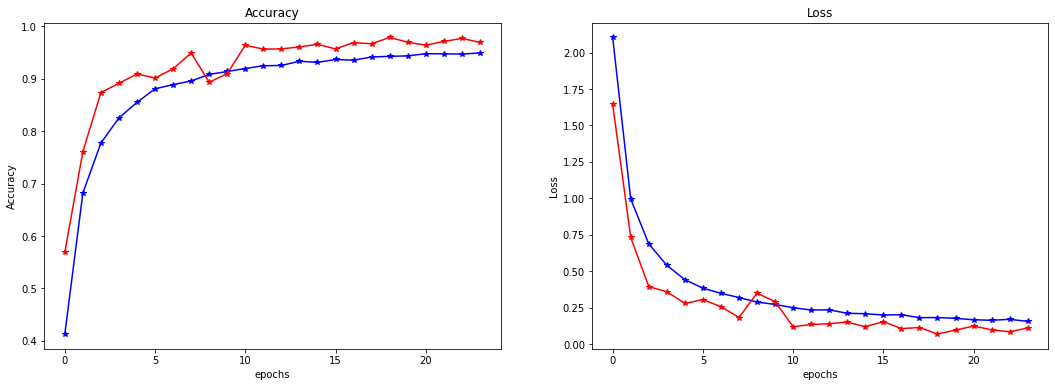

In [22]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'], label='Training Accuracy',color='blue',marker='*')
plt.plot(History.history['val_accuracy'], label='Training Accuracy',color='red',marker='*')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(History.history['loss'], label='Training Loss',color='blue',marker='*')
plt.plot(History.history['val_loss'], label='Val Loss',color='red',marker='*')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

# **Test Data**

In [23]:
Test_Data=pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv',usecols=['Path','ClassId'])
Test_Data.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


# **Data Cleaning**

In [24]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  12630 non-null  int64 
 1   Path     12630 non-null  object
dtypes: int64(1), object(1)
memory usage: 197.5+ KB


In [25]:
Test_Data.shape

(12630, 2)

In [26]:
Test_Data.isnull().sum()

ClassId    0
Path       0
dtype: int64

In [27]:
b=[i for i in Test_Data['Path'] if not i.endswith('.png')]
b

[]

# **Classification**

In [28]:
Test_gen=ImageDataGenerator(rescale=1./255)

Test_generator=Test_gen.flow_from_dataframe(Test_Data,
                                            '../input/gtsrb-german-traffic-sign',
                                            x_col='Path',
                                              y_col=None,
                                              target_size=(120,120),
                                              batch_size=15,
                                              class_mode=None)

Found 12630 validated image filenames.


In [29]:
predict=model.predict_classes(Test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
Test_Data['Predict']=predict
a=np.where(Test_Data['ClassId']==Test_Data['Predict'])
a

(array([   38,    73,    92,    96,   152,   186,   262,   267,   330,
          357,   394,   522,   530,   576,   612,   646,   708,   735,
          755,   789,   803,   840,   845,   881,   917,   922,   930,
          950,   986,  1081,  1132,  1171,  1187,  1213,  1235,  1271,
         1349,  1354,  1377,  1383,  1450,  1456,  1486,  1500,  1560,
         1562,  1607,  1648,  1716,  1768,  1779,  1782,  1790,  1855,
         1893,  1912,  1918,  1943,  1954,  1965,  1986,  2054,  2088,
         2142,  2172,  2204,  2208,  2234,  2255,  2269,  2280,  2290,
         2320,  2342,  2413,  2418,  2465,  2564,  2574,  2587,  2659,
         2663,  2676,  2679,  2681,  2732,  2778,  2795,  2826,  2946,
         2982,  2997,  3010,  3011,  3019,  3125,  3169,  3175,  3201,
         3269,  3276,  3302,  3304,  3335,  3401,  3463,  3500,  3627,
         3650,  3685,  3688,  3693,  3751,  3800,  3814,  3854,  3867,
         3915,  3936,  3955,  3995,  4018,  4025,  4067,  4168,  4200,
      

In [31]:
print(classification_report(Test_Data['ClassId'],Test_Data['Predict']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.05      0.05      0.05       720
           2       0.05      0.05      0.05       750
           3       0.03      0.03      0.03       450
           4       0.06      0.06      0.06       660
           5       0.04      0.05      0.04       630
           6       0.01      0.01      0.01       150
           7       0.01      0.01      0.01       450
           8       0.04      0.01      0.02       450
           9       0.06      0.04      0.05       480
          10       0.05      0.03      0.04       660
          11       0.04      0.02      0.02       420
          12       0.05      0.04      0.05       690
          13       0.06      0.01      0.01       720
          14       0.03      0.01      0.02       270
          15       0.02      0.01      0.01       210
          16       0.01      0.01      0.01       150
          17       0.01    

In [32]:
confusion_matrix(Test_Data['ClassId'],Test_Data['Predict'])

array([[ 0,  6,  1, ...,  1,  5,  2],
       [ 0, 38, 41, ..., 27, 26, 29],
       [ 1, 38, 38, ..., 23, 34, 29],
       ...,
       [ 0,  9,  4, ...,  2,  2,  3],
       [ 0,  5,  1, ...,  1,  2,  3],
       [ 0,  5,  6, ...,  4,  4,  4]])

In [33]:
Correct_pred=Test_Data.loc[[38,73,92,96,152,186,262,267,330],]
Correct_pred

,ClassId,Path,Predict
38,16,Test/00038.png,16
73,34,Test/00073.png,34
92,2,Test/00092.png,2
96,3,Test/00096.png,3
152,11,Test/00152.png,11
186,18,Test/00186.png,18
262,18,Test/00262.png,18
267,25,Test/00267.png,25
330,4,Test/00330.png,4


In [34]:
Correct_pred=Correct_pred.reset_index(drop=True)
Correct_pred.head()

,ClassId,Path,Predict
0,16,Test/00038.png,16
1,34,Test/00073.png,34
2,2,Test/00092.png,2
3,3,Test/00096.png,3
4,11,Test/00152.png,11


# **Prediction Visualization**

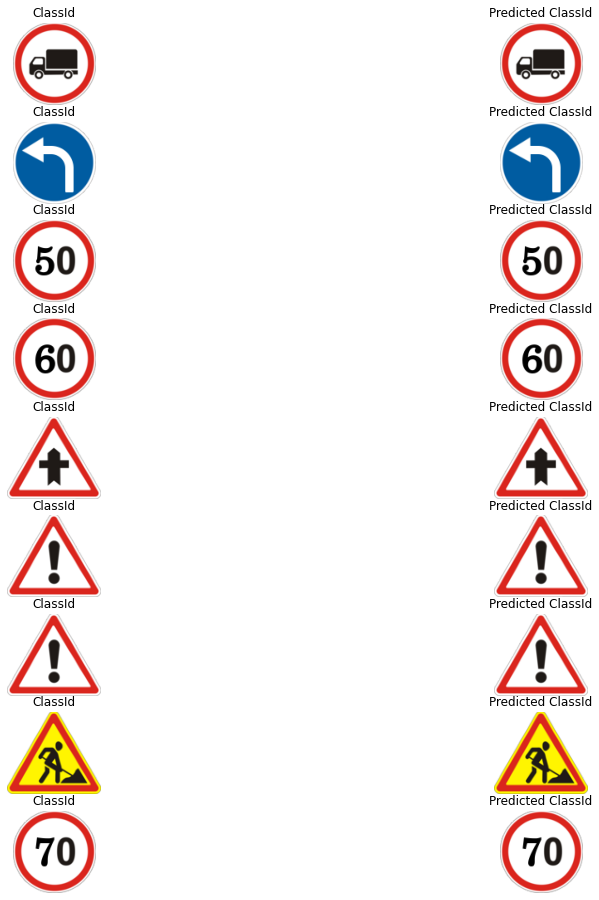

In [36]:
plt.figure(figsize=(16,16))
plt.tight_layout()
class_id=Correct_pred['ClassId']
pred=Correct_pred['Predict']
for i,j in enumerate(class_id):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(9,2,2*i+1)
    plt.axis('off')
    plt.title('ClassId')
    plt.imshow(img)
for i,j in enumerate(pred):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(9,2,2*i+2)
    plt.axis('off')
    plt.title('Predicted ClassId')
    plt.imshow(img)       

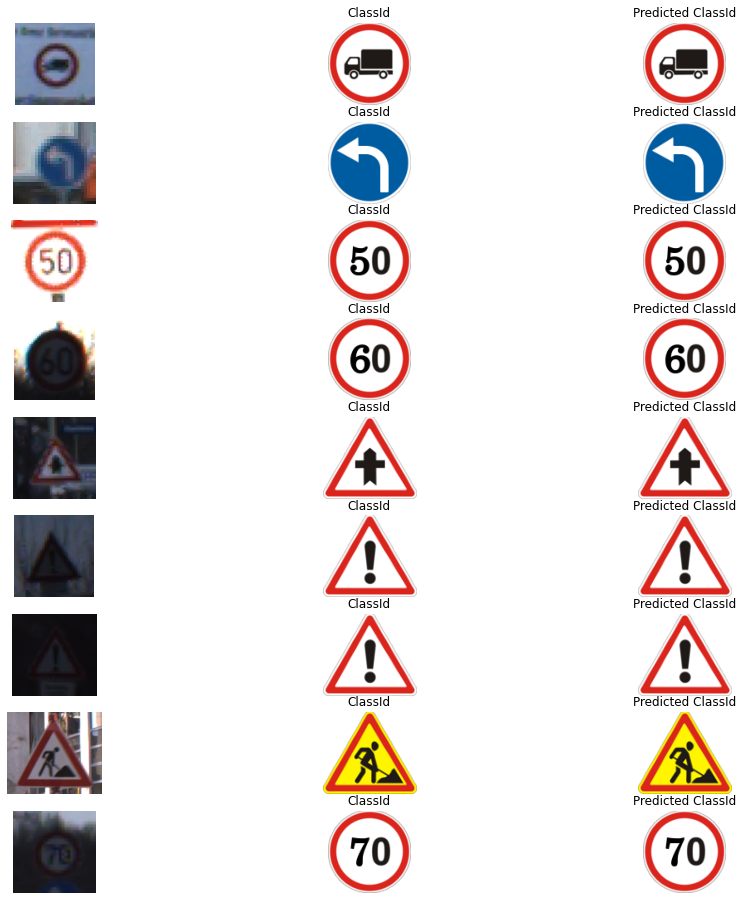

In [37]:
plt.figure(figsize=(16,16))
class_id=Correct_pred['ClassId']
pred=Correct_pred['Predict']

for i,j in enumerate(Correct_pred['Path']):
    img=Image.open('../input/gtsrb-german-traffic-sign/'+j)
    plt.subplot(9,3,3*i+1)
    plt.axis('off')
    plt.imshow(img)
    
for i,j in enumerate(class_id):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(9,3,3*i+2)
    plt.axis('off')
    plt.title('ClassId')
    plt.imshow(img)

for i,j in enumerate(pred):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(9,3,3*i+3)
    plt.axis('off')
    plt.title('Predicted ClassId')
    plt.imshow(img) 